In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('datasets1.csv')

In [4]:
# Data Preprocessing
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.drop('customerID', axis=1, inplace=True)
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 2})
df['InternetService'] = df['InternetService'].map({'DSL': 1, 'Fiber optic': 0, 'No': 2})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 2})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 2})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 2})
df['Contract'] = df['Contract'].map({'One year': 1, 'Month-to-month': 0, 'Two year': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['PaymentMethod'] = df['PaymentMethod'].map({'Mailed check': 1, 'Electronic check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df['TotalCharges'].mean(), inplace=True)

<Axes: xlabel='Churn', ylabel='count'>

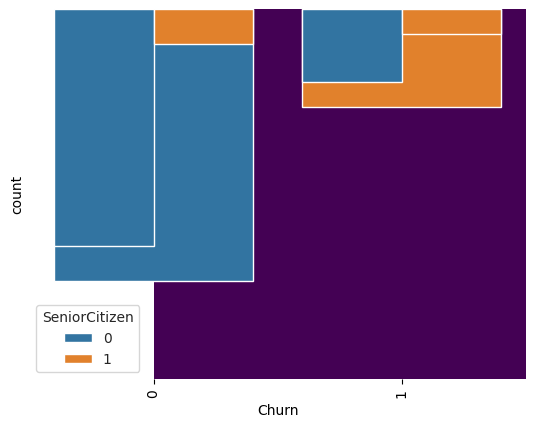

In [5]:
# Data Visualization
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
sns.set_style('whitegrid')
sns.countplot(x='Churn', data=df)
sns.countplot(x='Churn', hue='SeniorCitizen', data=df)

In [9]:
# One-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)
y_pred_logreg = logreg.predict(X_test_encoded)
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.810752688172043


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
from sklearn.preprocessing import StandardScaler

# One-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_test_encoded = scaler.transform(X_test_encoded)

# Instantiate and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_encoded, y_train)

# Make predictions and evaluate accuracy
y_pred_knn = knn.predict(X_test_encoded)
print("KNN Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))



KNN Accuracy: 0.7651612903225806


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_encoded = scaler.fit_transform(X_encoded)

# Instantiate the KNN model within a pipeline
knn_cv = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

# Cross-validation
scores_cv = cross_val_score(knn_cv, X_encoded, y, cv=10, scoring='accuracy')
print("Cross-validated KNN Accuracy:", scores_cv.mean())


Cross-validated KNN Accuracy: 0.7543657317859445
